# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.\
The features and labels are read from a given csv-file.

## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [1]:
import os
import pandas as pd

recording_location = './'

all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [2]:
# Uncomment the following lines to see all columns of the csv file (i.e., the features and labels)
print("Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:")
list(df.columns)

Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:


['meanFix',
 'minFix',
 'maxFix',
 'varFix',
 'stdFix',
 'meanDis',
 'minDis',
 'maxDis',
 'varDis',
 'stdDisp',
 'freqDisPerSec',
 'number_of_blinks',
 'blinkMean',
 'blinkMin',
 'blinkMax',
 'blinkRate',
 'xDir',
 'yDir',
 'fixDensPerBB',
 'label',
 'duration',
 'participant_id']

In [3]:
from IPython.display import display

read_df = df[df.label == 'Reading']
inspect_df = df[df.label == 'Inspection']
search_df = df[df.label == 'Search']

#print("Sample reading data:")
#display(read_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample inspection data:")
#display(inspect_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample search data:")
#display(search_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

## For the classification we used a modified version of [an SVM cassifier.](https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02)
First, we need to include some libraries 

In [4]:
#
#Importing the necessary packages and libaries
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

## Let's store the labels and six selected features (among nineteen as denoted in the csv file)

In [5]:
features = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
labels = df ['label']

## This is how the features and labels look

In [6]:
print("Features:")
display(features.head(10))
print("Labels:")
display(labels.head(10))

Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,250.882353,666,16554.228164,0.484848,0.606061,369.479986
1,246.742857,900,23549.020168,0.529412,0.529412,363.711018
2,237.257143,1067,36627.431933,0.441176,0.558824,266.246748
3,293.137931,767,35208.551724,0.500000,0.500000,319.553727
4,199.125000,566,12614.163462,0.589744,0.487179,305.832090
5,262.562500,867,36411.415323,0.516129,0.580645,236.757891
6,204.175000,733,16987.430128,0.538462,0.512821,445.453567
7,221.540541,733,19568.977477,0.583333,0.500000,538.273012
8,430.095238,2567,322794.690476,0.800000,0.450000,77.460002
9,227.805556,533,8651.246825,0.914286,0.457143,132.320562


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

## Let's normalize the features (i.e., each column indivudally)

In [6]:
scaler = MaxAbsScaler()
scaler.fit(features)
scaled = scaler.transform(features)
scaled_features = pd.DataFrame(scaled, columns=features.columns)
print("Normalized Features:")
display(scaled_features.head(10))

Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355
1,0.405249,0.195652,0.019651,0.575448,0.649733,0.234633
2,0.389670,0.231957,0.030564,0.479540,0.685829,0.171758
3,0.481448,0.166739,0.029380,0.543478,0.613636,0.206147
4,0.327042,0.123043,0.010526,0.641026,0.597902,0.197295
5,0.431232,0.188478,0.030384,0.561010,0.712610,0.152735
6,0.335336,0.159348,0.014175,0.585284,0.629371,0.287366
7,0.363857,0.159348,0.016330,0.634058,0.613636,0.347245
8,0.706387,0.558043,0.269361,0.869565,0.552273,0.049970
9,0.374147,0.115870,0.007219,0.993789,0.561039,0.085361


## Let's split the data and have two sets, one for training the model and one for testing it.

In [7]:
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)

# Uncomment the following line if you want to work with normalized features. You will note how the accuracy and confusion matrix changes
# feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)

## We can work with different SVM-kernels:

In [13]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

## Lets collect the predictions from test data. . .

In [9]:
linear_pred = linear.predict(feature_test)
poly_pred = poly.predict(feature_test)
rbf_pred = rbf.predict(feature_test)
sig_pred = sig.predict(feature_test)

NameError: name 'linear' is not defined

## . . . and have a look at the accuracy of each one:

In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(feature_test, label_test)
accuracy_poly = poly.score(feature_test, label_test)
accuracy_rbf = rbf.score(feature_test, label_test)
accuracy_sig = sig.score(feature_test, label_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
      

## This is how the confusion matrix of each predictor looks like

In [ ]:
# creating a confusion matrix
cm_lin = confusion_matrix(label_test, linear_pred)
cm_poly = confusion_matrix(label_test, poly_pred)
cm_rbf = confusion_matrix(label_test, rbf_pred)
cm_sig = confusion_matrix(label_test, sig_pred)

print("CM Linear:")
print(cm_lin)
print("CM Polynomial:")
print(cm_poly)
print("CM Radial:")
print(cm_rbf)
print("CM Sigmoid:")
print(cm_sig)

## A more colorful confusion matrix for the linear predictor

In [ ]:
ConfusionMatrixDisplay.from_estimator(linear, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(poly, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rbf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(sig, feature_test, label_test)

## Finally, let's make a cross check

In [ ]:
feature_test.head()

In [ ]:
linear.predict(np.array(features.iloc[59]).reshape(1,-1))

## Let's detect the label (i.e., the activity) of some new features (i.e., that are extracted from a new stream of eye tracking data):

In [ ]:
print("New Feature:")
# NOTE that we use a particular feature from the test dataset but this can be replaced with new data e.g., that arrives online and was not included in training or testing the classifier
new_feature = feature_test.tail(2)
display(new_feature)

new_linear_pred = linear.predict_proba(new_feature)
new_linear_pred_2 = linear.predict(new_feature)
print("New Linear Prediction:")
display(new_linear_pred)
display(new_linear_pred_2)

new_poly_pred_2 = poly.predict(new_feature)
new_poly_pred = poly.predict_proba(new_feature)
print("New Poly Prediction:")
display(new_poly_pred)
display(new_poly_pred_2)

new_rbf_pred_2 = rbf.predict(new_feature)
new_rbf_pred = rbf.predict_proba(new_feature)
print("New RBF Prediction:")
display(new_rbf_pred)
display(new_rbf_pred_2)

new_sig_pred_2 = sig.predict(new_feature)
new_sig_pred = sig.predict_proba(new_feature)
print("New Sig Prediction:")
display(new_sig_pred)
display(new_sig_pred_2)

In [8]:
label_train

267    Inspection
352       Reading
373       Reading
297       Reading
93     Inspection
          ...    
231       Reading
336       Reading
246    Inspection
273       Reading
28        Reading
Name: label, Length: 308, dtype: object

In [ ]:
label_train[0]

In [8]:
classes = ["Inspection", "Reading", "Search"]
labels = [(classes.index(item)) for item in label_train]

In [11]:
labels

0      Inspection
1      Inspection
2      Inspection
3      Inspection
4      Inspection
          ...    
380        Search
381        Search
382        Search
383        Search
384        Search
Name: label, Length: 385, dtype: object

In [ ]:
params = {}

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle
import lightgbm as lgb

def setup_with_features(using_scaled_features = False, feature_set = ['participant_id']):
    recording_location = './'

    all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
    df = pd.read_csv(all_features_csv)
    features = df[feature_set]
    labels = df ['label']
    scaler = MaxAbsScaler()
    scaler.fit(features)
    scaled = scaler.transform(features)
    scaled_features = pd.DataFrame(scaled, columns=features.columns)
    if using_scaled_features:
        feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)
    else:
        feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)
    return feature_train, feature_test, label_train, label_test

def test_parameters(results, using_scaling, f_set, feature_train, feature_test, label_train, label_test, iterations=1000, learning_rate=0.1, depth=6, l2_leaf_reg=3):
    key = f'{str(using_scaling)}, {str(f_set)}, {str(iterations)}, {str(learning_rate)}, {str(depth)}, {str(l2_leaf_reg)}'
    model = lgb.LGBMClassifier(
        boosting_type='gbdt',
        n_iterations=iterations,  # Number of boostinstr(l2_leaf_reg)g iterations
        learning_rate=learning_rate,  # Learning rate
        max_depth=depth,  # Maximum depth of trees
        reg_lambda=l2_leaf_reg,  # L2 regularization strength (equivalent to CatBoost's l2_leaf_reg)
        objective='multiclass',  # Multiclass classification
        num_class=len(np.unique(label_train)),  # Number of classes
        verbose=-1,
        num_leaves=64,
        num_threads=12
    )
    model.fit(feature_train, label_train)
    y_pred = model.predict(feature_test)
    accuracy_cat = accuracy_score(label_test, y_pred)
    results[key] = accuracy_cat


with_or_without_scaled_features = [True,
                                    # False
                                    ]
feature_sets = [[ "xDir", "yDir", "fixDensPerBB"], 
                # ["meanFix", "maxFix", "varFix"], 
                # ["meanFix", "maxFix", "varFix", "xDir", "yDir"], 
                # ["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"],
                # ["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"],
                # [ 'blinkMean', 'blinkMin', 'blinkMax', 'blinkRate', 'xDir', 'yDir', 'fixDensPerBB', 'duration', 'participant_id'],
                # [ 'varFix', 'stdFix', 'meanDis',  'varDis', 'stdDisp', 'freqDisPerSec', 'number_of_blinks', 'blinkMean', 'blinkRate', 'xDir', 'yDir', 'fixDensPerBB'],
                # ['minFix', 'maxFix', 'minDis', 'maxDis', 'blinkMin', 'blinkMax', 'xDir', 'yDir', 'fixDensPerBB'],
                # ['minFix', 'maxFix', 'varFix', 'stdFix', 'meanDis', 'minDis', 'maxDis', 'varDis', 'stdDisp', 'freqDisPerSec', 'number_of_blinks', 'blinkMean', 'blinkMin', 'blinkMax', 'blinkRate', 'xDir', 'yDir', 'fixDensPerBB', 'duration', 'participant_id']
                ]
results = {}
iteration_list = [10, 100, 1000, 10000]
learning_rate_list = [0.0005, 0.005, 0.05, 0.5]
depth_list = [-1]
l2_leaf_reg_list = [1, 2,3]

for boo in with_or_without_scaled_features:
    for f_set in feature_sets:
        for i in iteration_list:
            for l in learning_rate_list:
                for d in depth_list:
                    for l2 in l2_leaf_reg_list:
                        feature_train, feature_test, label_train, label_test = setup_with_features(boo, f_set)
                        test_parameters(results, boo, f_set, feature_train, feature_test, label_train, label_test, iterations=i, learning_rate=l, depth=d, l2_leaf_reg=l2)
        print("Done with feature set: " + str(f_set))
    print("Done with scaling: " + str(boo))

print(results)

# Specify the file path where you want to save the dictionary
file_path = 'results.pkl'

# Open the file in binary write mode ('wb')
with open(file_path, 'wb') as file:
    # Use pickle.dump to save the dictionary to the file
    pickle.dump(results, file)

sorted_dict = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Print the top 3 key-value pairs
top_3 = list(sorted_dict.items())[:3]
for key, value in top_3:
    print(f'{key}: {value}')

Done with feature set: ['xDir', 'yDir', 'fixDensPerBB']
Done with scaling: True
{"True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.0005, -1, 1": 0.8311688311688312, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.0005, -1, 2": 0.8311688311688312, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.0005, -1, 3": 0.8701298701298701, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.005, -1, 1": 0.8961038961038961, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.005, -1, 2": 0.8961038961038961, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.005, -1, 3": 0.8961038961038961, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.05, -1, 1": 0.8441558441558441, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.05, -1, 2": 0.8441558441558441, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.05, -1, 3": 0.8441558441558441, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.5, -1, 1": 0.8311688311688312, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10, 0.5, -1, 2": 0.8181818181818182, "True, ['xDir', 'yDir', 'fixDensPerBB'], 10

In [10]:
import pickle

model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    n_iterations=10,  # Number of boostinstr(l2_leaf_reg)g iterations
    learning_rate=0.005,  # Learning rate
    max_depth=-1,  # Maximum depth of trees
    reg_lambda=3,  # L2 regularization strength (equivalent to CatBoost's l2_leaf_reg)
    objective='multiclass',  # Multiclass classification
    num_class=len(np.unique(label_train)),  # Number of classes
    verbose=-1,
    num_leaves=64,
    num_threads=12
)

model.fit(feature_train, label_train)

with open('classifier.pkl', 'wb') as file:
    pickle.dump(model, file)


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

  Inspection       0.81      0.96      0.88        26
     Reading       1.00      0.96      0.98        26
      Search       0.90      0.76      0.83        25

    accuracy                           0.90        77
   macro avg       0.90      0.89      0.89        77
weighted avg       0.90      0.90      0.90        77



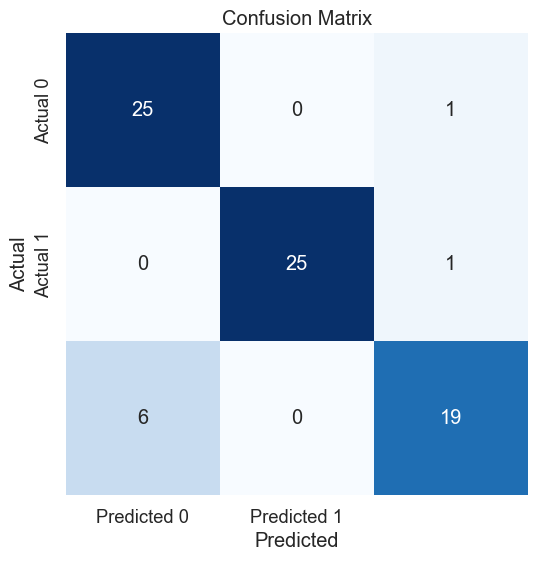

In [13]:
import seaborn as sns
y_pred = model.predict(feature_test)

accuracy = accuracy_score(label_test, y_pred)
confusion = confusion_matrix(label_test, y_pred)
classification_rep = classification_report(label_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Set font size for labels

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
